## Evasion attack and poisoning attack on SVM

In [49]:
import secml
import secml.ml
import secml.ml.classifiers
import sklearn
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from secml.array import CArray
from secml.data import CDataset
from secml.ml.classifiers import CClassifierSVM, CClassifierKNN, CClassifierLogistic, CClassifierRidge
%matplotlib inline

In [50]:
from secml.ml.classifiers.sklearn.c_classifier_sklearn import CClassifierSkLearn

In [51]:
# NBVAL_IGNORE_OUTPUT
from secml.data.loader import CDataLoaderMNIST

# MNIST dataset will be downloaded and cached if needed
loader = CDataLoaderMNIST()

### Evasion Attack

In [93]:
random_state = 999

n_tr = 100  # Number of training set samples
n_val = 500  # Number of validation set samples
n_ts = 50  # Number of test set samples

digits = (0, 1)

tr_val = loader.load('training', digits=digits, num_samples=n_tr + n_val)
ts = loader.load('testing', digits=digits, num_samples=n_ts)

# Split in training and validation set
tr = tr_val[:n_tr, :]
val = tr_val[n_tr:, :]

# Normalize the features in `[0, 1]`
tr.X /= 255
val.X /= 255
ts.X /= 255

from secml.ml.classifiers import CClassifierSVM
# train SVM in the dual space, on a linear kernel, as needed for poisoning
clf = CClassifierSVM(C=1, kernel='linear')

print("Training of classifier...")
clf.fit(tr.X, tr.Y)

# Compute predictions on a test set
y_pred = clf.predict(ts.X)

# Metric to use for performance evaluation
from secml.ml.peval.metrics import CMetricAccuracy
metric = CMetricAccuracy()

# Evaluate the accuracy of the classifier
acc = metric.performance_score(y_true=ts.Y, y_pred=y_pred)

print("Accuracy on test set: {:.2%}".format(acc))

Training of classifier...
Accuracy on test set: 100.00%


In [91]:
target_clf = CClassifierKNN(n_neighbors=50)
target_clf.fit(tr.X, tr.Y)
acc = metric.performance_score(y_true=ts.Y, y_pred=target_clf.predict(ts.X))

print("Accuracy on test set: {:.2%}".format(acc))

Accuracy on test set: 94.00%


In [83]:
# For simplicity, let's attack a subset of the test set
attack_ds = ts

noise_type = 'l2'  # Type of perturbation 'l1' or 'l2'
dmax = 5  # Maximum perturbation
lb, ub = 0., 1.  # Bounds of the attack space. Can be set to `None` for unbounded
y_target = None  # None if `error-generic` or a class label for `error-specific`

# Should be chosen depending on the optimization problem
solver_params = {
    'eta': 0.5,
    'eta_min': 2.0,
    'eta_max': None,
    'max_iter': 100,
    'eps': 1e-6
}

from secml.adv.attacks import CAttackEvasionPGDLS
pgd_ls_attack = CAttackEvasionPGDLS(classifier=clf,
                                    double_init_ds=tr,
                                    distance=noise_type,
                                    dmax=dmax,
                                    solver_params=solver_params,
                                    y_target=y_target)

print("Attack started...")

eva_y_pred, _, eva_adv_ds, _ = pgd_ls_attack.run(attack_ds.X, attack_ds.Y)
print("Attack complete!")

acc = metric.performance_score(
    y_true=attack_ds.Y, y_pred=clf.predict(attack_ds.X))
acc_attack = metric.performance_score(
    y_true=attack_ds.Y, y_pred=eva_y_pred)

print("Accuracy on reduced test set before attack: {:.2%}".format(acc))
print("Accuracy on reduced test set after attack: {:.2%}".format(acc_attack))

Attack started...
Attack complete!
Accuracy on reduced test set before attack: 100.00%
Accuracy on reduced test set after attack: 66.00%


In [ ]:
for d_max in range()

In [73]:
print(metric.performance_score(y_true=ts.Y, y_pred=target_clf.predict(eva_adv_ds.X)))

0.88


In [102]:
results = np.zeros((4, 10))
for k_idx, k in enumerate([1,10,25,50]):
    for d_idx, dmax in enumerate(np.arange(2,5,0.3)):
        # For simplicity, let's attack a subset of the test set
        target_clf = CClassifierKNN(n_neighbors=k)
        target_clf = target_clf.fit(tr.X, tr.Y)
        attack_ds = ts
        noise_type = 'l2'  # Type of perturbation 'l1' or 'l2'
        lb, ub = 0., 1.  # Bounds of the attack space. Can be set to `None` for unbounded
        y_target = None  # None if `error-generic` or a class label for `error-specific`
        # Should be chosen depending on the optimization problem
        solver_params = {
            'eta': 0.5,
            'eta_min': 2.0,
            'eta_max': None,
            'max_iter': 100,
            'eps': 1e-6
        }

        from secml.adv.attacks import CAttackEvasionPGDLS
        pgd_ls_attack = CAttackEvasionPGDLS(classifier=clf,
                                            double_init_ds=tr,
                                            distance=noise_type,
                                            dmax=dmax,
                                            solver_params=solver_params,
                                            y_target=y_target)

        print("Attack started...")
        eva_y_pred, _, eva_adv_ds, _ = pgd_ls_attack.run(attack_ds.X, attack_ds.Y)
        results[k_idx, d_idx] = metric.performance_score(y_true=ts.Y, y_pred=target_clf.predict(eva_adv_ds.X))

Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...
Attack started...


In [101]:
np.arange(2,5.,0.3).shape

(10,)

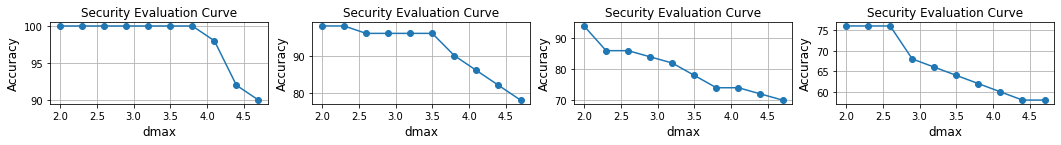

In [106]:
fig, axs = plt.subplots(1,4, figsize=(4.5*4, 1.5))
for i in range(4):
    ax = axs[i]
    ax.plot(np.arange(2, 5, 0.3), results[i]*100, marker="o")
    ax.set_title("Security Evaluation Curve")
    ax.set_ylabel("Accuracy",fontsize=12)
    ax.set_xlabel("dmax",fontsize=12)
    ax.grid(":")

In [104]:
np.diff(results, axis=1).mean(axis=1)*100

array([-1.111111, -2.222222, -2.666667, -2.      ])

In [105]:
np.diff(results, axis=1).std(axis=1)*100

array([1.911628, 2.199888, 2.309401, 2.309401])

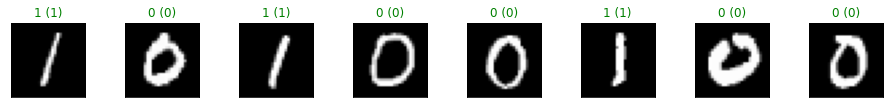

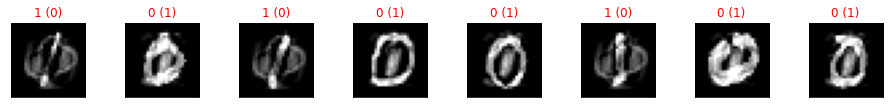

In [92]:
from secml.figure import CFigure
# Only required for visualization in notebooks
%matplotlib inline

# Let's define a convenience function to easily plot the MNIST dataset
def show_digits(samples, preds, labels, digs, n_display=8):
    samples = samples.atleast_2d()
    n_display = min(n_display, samples.shape[0])
    fig = CFigure(width=n_display*2, height=3)
    for idx in range(n_display):
        fig.subplot(2, n_display, idx+1)
        fig.sp.xticks([])
        fig.sp.yticks([])
        fig.sp.imshow(samples[idx, :].reshape((28, 28)), cmap='gray')
        fig.sp.title("{} ({})".format(digits[labels[idx].item()], digs[preds[idx].item()]),
                     color=("green" if labels[idx].item()==preds[idx].item() else "red"))
    fig.show()

show_digits(attack_ds.X, clf.predict(attack_ds.X), attack_ds.Y, digits)
show_digits(eva_adv_ds.X, clf.predict(eva_adv_ds.X), eva_adv_ds.Y, digits)

In [31]:
Cs = np.logspace(-2,1,4)

In [32]:
eval_objs = [ ]
for C in Cs:
    clf = CClassifierSVM(C=C, kernel="linear")
    clf = clf.fit(tr.X, tr.Y)
    noise_type = 'l2'  # Type of perturbation 'l1' or 'l2'
    dmax = 0.4  # Maximum perturbation
    lb, ub = None, None  # Bounds of the attack space. Can be set to `None` for unbounded
    y_target = None  # None if `error-generic` or a class label for `error-specific`
    # Should be chosen depending on the optimization problem
    solver_params = {
        'eta': 0.3,
        'eta_min': 0.1,
        'eta_max': None,
        'max_iter': 100,
        'eps': 1e-4
    }

    pgd_ls_attack = CAttackEvasionPGDLS(
        classifier=clf,
        double_init_ds=tr,
        distance=noise_type,
        dmax=dmax,
        lb=lb, ub=ub,
        solver_params=solver_params,
        y_target=y_target)

    from secml.array import CArray
    e_vals = CArray.arange(start=2, step=0.3, stop=5.1)

    from secml.adv.seceval import CSecEval
    sec_eval = CSecEval(
        attack=pgd_ls_attack, param_name='dmax', param_values=e_vals)

    # Run the security evaluation using the test set
    print("Running security evaluation...")
    sec_eval.run_sec_eval(ts)
    eval_objs.append(sec_eval)
#     from secml.figure import CFigure
#     fig = CFigure(height=5, width=5)

#     # Convenience function for plotting the Security Evaluation Curve
#     fig.sp.plot_sec_eval(
#         sec_eval.sec_eval_data, marker='o', label='Logistic Regression', show_average=True)

Running security evaluation...
Running security evaluation...
Running security evaluation...
Running security evaluation...


In [24]:
from secml.figure._plots.c_plot_sec_eval import _cmpt_sec_eval_curve
from secml.ml.peval.metrics import CMetric

In [33]:
def calculate_delta(sec_eval_data, metric="accuracy", metric_args=(), mean=True):
    metric = CMetric.create(metric, *metric_args)

    if not isinstance(sec_eval_data, list):
        sec_eval_data = [sec_eval_data]

    n_sec_eval = len(sec_eval_data)
    n_param_val = sec_eval_data[0].param_values.size
    perf = CArray.zeros((n_sec_eval, n_param_val))

    for i in range(n_sec_eval):
        if sec_eval_data[i].param_values.size != n_param_val:
            raise ValueError("the number of sec eval parameters changed!")

        perf[i, :] = _cmpt_sec_eval_curve(sec_eval_data[i], metric)

    if mean is True:
        perf_std = perf.std(axis=0, keepdims=False)
        perf = perf.mean(axis=0, keepdims=False)
    else:
        if len(sec_eval_data) > 1:
            raise ValueError("if `mean` is False, "
                             "only one sec eval data should be passed")

    perf = perf.ravel()
    diff = perf[:-1] - perf[1:]
    return diff.mean(), diff.std()

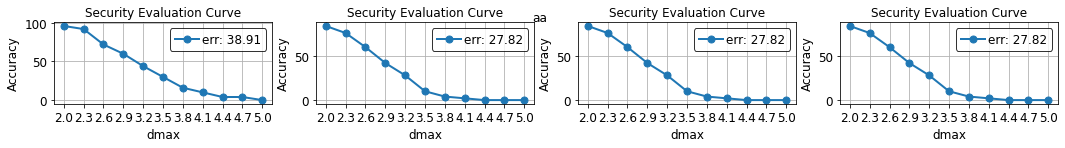

In [34]:
from secml.figure import CFigure
fig = CFigure(height=1.5, width=4.5*len(Cs))
fig.title("aa")
for idx in range(4):
    fig.subplot(1, 4, idx+1)
    # Convenience function for plotting the Security Evaluation Curve
    C = Cs[idx]
    fig.sp.plot_sec_eval(
        eval_objs[idx].sec_eval_data, marker='o', show_average=True, percentage=True)


In [41]:
for idx in range(4):
    print([i *100 for i in calculate_delta(eval_objs[idx].sec_eval_data)])

[9.6, 6.1188234163113435]
[8.399999999999999, 7.08801805866774]
[8.399999999999999, 7.08801805866774]
[8.399999999999999, 7.08801805866774]


In [36]:
1/Cs

array([100. ,  10. ,   1. ,   0.1])

In [43]:
# clf = CClassifierLogistic()
# clf = clf.fit(train.X, train.Y)

### Poisoning attack

Attack started...
Attack complete!
Original accuracy on test set: 100.00%
Accuracy after attack on test set: 76.00%


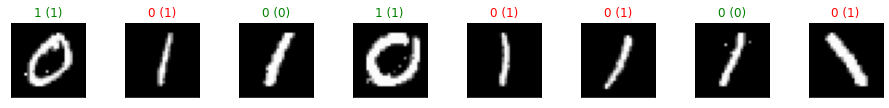

In [44]:
lb, ub = 0., 1.  # Bounds of the attack space. Can be set to `None` for unbounded
n_poisoning_points = 15  # Number of poisoning points to generate

# Should be chosen depending on the optimization problem
solver_params = {
    'eta': 0.25,
    'eta_min': 2.0,
    'eta_max': None,
    'max_iter': 100,
    'eps': 1e-6
}

from secml.adv.attacks import CAttackPoisoningSVM
pois_attack = CAttackPoisoningSVM(classifier=clf,
                                  training_data=tr,
                                  val=val,
                                  lb=lb, ub=ub,
                                  solver_params=solver_params,
                                  random_seed=random_state)
pois_attack.n_points = n_poisoning_points

# Run the poisoning attack
print("Attack started...")
pois_y_pred, _, pois_points_ds, _ = pois_attack.run(ts.X, ts.Y)
print("Attack complete!")

# Evaluate the accuracy of the original classifier
acc = metric.performance_score(y_true=ts.Y, y_pred=clf.predict(ts.X))
# Evaluate the accuracy after the poisoning attack
pois_acc = metric.performance_score(y_true=ts.Y, y_pred=pois_y_pred)

print("Original accuracy on test set: {:.2%}".format(acc))
print("Accuracy after attack on test set: {:.2%}".format(pois_acc))

# Training of the poisoned classifier for visualization purposes
pois_clf = clf.deepcopy()
pois_tr = tr.append(pois_points_ds)  # Join the training set with the poisoning points
pois_clf.fit(pois_tr.X, pois_tr.Y)

show_digits(pois_points_ds.X, pois_clf.predict(pois_points_ds.X),
            pois_points_ds.Y, digits)

In [45]:
y_pred = clf.predict(ts.X)

In [46]:
eval_objs = [ ]
for C in Cs:
    clf = CClassifierSVM(C=C, kernel="linear")
    clf = clf.fit(tr.X, tr.Y)
    lb, ub = val.X.min(), val.X.max()  # Bounds of the attack space. Can be set to `None` for unbounded
    n_poisoning_points = 20  # Number of poisoning points to generate

    # Should be chosen depending on the optimization problem
    solver_params = {
        'eta': 0.05,
        'eta_min': 0.05,
        'eta_max': None,
        'max_iter': 100,
        'eps': 1e-6
    }

    from secml.adv.attacks import CAttackPoisoningSVM
    pois_attack = CAttackPoisoningSVM(classifier=clf,
                                      training_data=tr,
                                      val=val,
                                      lb=val.X.min(), ub=val.X.max(),
                                      solver_params=solver_params)
    pois_attack.n_points = n_poisoning_points

    # Run the poisoning attack
    # print("Attack started...")
    # pois_y_pred, pois_scores, pois_ds, f_opt = pois_attack.run(val.X, val.Y, max_iter=10)
    # print("Attack complete!")

    from secml.adv.seceval import CSecEval
    sec_eval = CSecEval(
        attack=pois_attack, param_name='dmax', param_values=e_vals)

    # Run the security evaluation using the test set
    print("Running security evaluation...")
    sec_eval.run_sec_eval(ts)
    eval_objs.append(sec_eval)
#     from secml.figure import CFigure
#     fig = CFigure(height=5, width=5)

#     # Convenience function for plotting the Security Evaluation Curve
#     fig.sp.plot_sec_eval(
#         sec_eval.sec_eval_data, marker='o', label='SVM RBF', show_average=True)

    # Evaluate the accuracy of the original classifier
    # acc = metric.performance_score(y_true=val.Y, y_pred=y_pred)
    # # Evaluate the accuracy after the poisoning attack
    # pois_acc = metric.performance_score(y_true=val.Y, y_pred=pois_y_pred)

    # print("Original accuracy on test set: {:.2%}".format(acc))
    # print("Accuracy after attack on test set: {:.2%}".format(pois_acc))

Running security evaluation...
Running security evaluation...
Running security evaluation...
Running security evaluation...


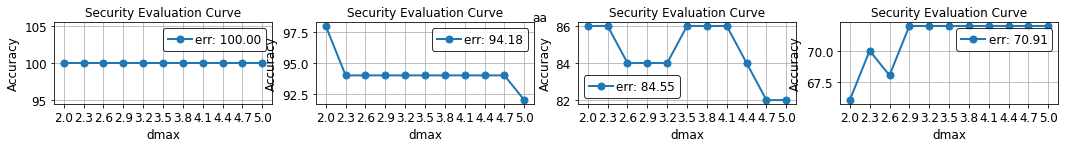

In [48]:
from secml.figure import CFigure
fig = CFigure(height=1.5, width=4.5*len(Cs))
fig.title("aa")
for idx in range(4):
    fig.subplot(1, 4, idx+1)
    # Convenience function for plotting the Security Evaluation Curve
    C = Cs[idx]
    fig.sp.plot_sec_eval(
        eval_objs[idx].sec_eval_data, marker='o', show_average=True, percentage=True)


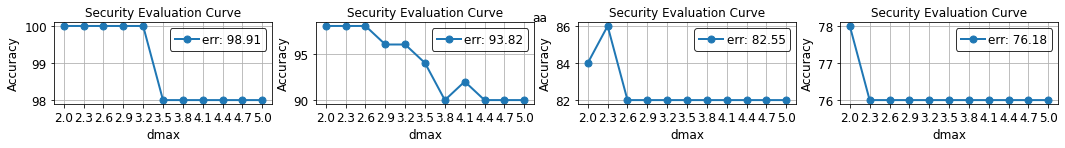

In [28]:
from secml.figure import CFigure
fig = CFigure(height=1.5, width=4.5*len(Cs))
fig.title("aa")
for idx in range(4):
    fig.subplot(1, 4, idx+1)
    # Convenience function for plotting the Security Evaluation Curve
    C = Cs[idx]
    fig.sp.plot_sec_eval(
        eval_objs[idx].sec_eval_data, marker='o', show_average=True, percentage=True)


In [47]:
for idx in range(4):
    print([i*100 for i in calculate_delta(eval_objs[idx].sec_eval_data)])

[0.0, 0.0]
[0.5999999999999994, 1.2806248474865698]
[0.40000000000000036, 1.200000000000001]
[-0.5999999999999994, 1.799999999999996]


In [ ]:
arget_clf_list = [
    CLF(
        clf_name='SVM Linear',
        clf=CClassifierMulticlassOVA(CClassifierSVM, kernel='linear'),
        xval_parameters={'C': [1e-2, 0.1, 1]}),
    CLF(clf_name='SVM RBF',
        clf=CClassifierMulticlassOVA(CClassifierSVM, kernel='rbf'),
        xval_parameters={'C': [1e-2, 0.1, 1],  'kernel.gamma': [1, 10, 100]}),
    CLF(clf_name='Logistic (SGD)',
        clf=CClassifierMulticlassOVA(
            CClassifierSGD, regularizer='l2', loss='log',
            random_state=random_state),
        xval_parameters={'alpha': [1e-6, 1e-5, 1e-4]}),
    CLF(clf_name='kNN',
        clf=CClassifierKNN(),
        xval_parameters={'n_neighbors': [30, 40, 50]}),
    CLF(clf_name='Decision Tree',
        clf=CClassifierDecisionTree(random_state=random_state),
        xval_parameters={'max_depth': [1, 3, 5]}),
    CLF(clf_name='Random Forest',
        clf=CClassifierRandomForest(random_state=random_state),
        xval_parameters={'n_estimators': [20, 30, 40]}),
]